In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub

symptom2disease_path = kagglehub.dataset_download('niyarrbarman/symptom2disease')

print(symptom2disease_path + '/Symptoms2Disease.csv')

/Users/danielfishbein/Documents/python-ml-final/ml_venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/danielfishbein/.cache/kagglehub/datasets/niyarrbarman/symptom2disease/versions/1/Symptoms2Disease.csv


In [5]:
print(symptom2disease_path + '/Symptom2Disease.csv')

/Users/danielfishbein/.cache/kagglehub/datasets/niyarrbarman/symptom2disease/versions/1/Symptom2Disease.csv


In [6]:
!pip install -U nltk
!pip install contractions


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string
import contractions
from scipy.sparse import vstack

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import ace_tools_open as tools

In [8]:
# nltk.data.path.append('/Users/danielfishbein/nltk_data')

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/danielfishbein/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [10]:
!pip install bash_kernel


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!unzip -o /Users/danielfishbein/nltk_data/corpora/wordnet.zip -d /Users/danielfishbein/nltk_data/corpora

Archive:  /Users/danielfishbein/nltk_data/corpora/wordnet.zip
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/lexnames  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/data.verb  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/index.adv  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/adv.exc  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/index.verb  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/data.adj  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/index.adj  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/LICENSE  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/citation.bib  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/noun.exc  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/verb.exc  
  inflating: /Users/danielfishbein/nltk_data/corpora/wordnet/REA

In [12]:
!unzip -o /Users/danielfishbein/nltk_data/tokenizers/punkt.zip -d /Users/danielfishbein/nltk_data/tokenizers/

Archive:  /Users/danielfishbein/nltk_data/tokenizers/punkt.zip
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/greek.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/estonian.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/turkish.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/polish.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/greek.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/estonian.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/turkish.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/polish.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/russian.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/czech.pickle  
  inflating: /Users/danielfishbein/nltk_data/tokenizers//punkt/PY3/portuguese.pickle  
  inflating: /Users/danielfishbe

In [13]:
symptom_disease_data = pd.read_csv(symptom2disease_path + '/Symptom2Disease.csv')

In [14]:
symptom_disease_data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [15]:
symptom_disease_data.isnull().values.all()

np.False_

In [16]:
symptom_disease_data.columns

Index(['Unnamed: 0', 'label', 'text'], dtype='object')

In [17]:
symptom_disease_data = symptom_disease_data.rename(columns={'Unnamed: 0': 'sym_id'})

In [18]:
symptom_disease_data.label.unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [19]:
symptom_disease_data.groupby(['label']).count()

,sym_id,text
label,,
Acne,50,50
Arthritis,50,50
Bronchial Asthma,50,50
Cervical spondylosis,50,50
Chicken pox,50,50
Common Cold,50,50
Dengue,50,50
Dimorphic Hemorrhoids,50,50
Fungal infection,50,50


In [20]:
symptom_disease_data.head()

,sym_id,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [21]:
symptom_disease_data.sym_id[0], symptom_disease_data.label[0], symptom_disease_data.text[0]

(np.int64(0),
 'Psoriasis',
 'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.')

In [22]:
symptom_disease_data.sym_id[100], symptom_disease_data.label[100], symptom_disease_data.text[100]

(np.int64(100),
 'Typhoid',
 "I have constipation and belly pain, and it's been really uncomfortable. The belly pain has been getting worse and is starting to affect my daily life. Moreover, I get chills every night, followed by a mild fever.")

In [23]:
symptom_disease_data.sym_id[500], symptom_disease_data.label[500], symptom_disease_data.text[500]

(np.int64(200),
 'Arthritis',
 "My muscles have been feeling really weak, and my neck has been extremely tight. I've been experiencing a lot of stiffness when I walk about and my joints have been swollen. Walking has also been really uncomfortable.")

In [24]:
symptom_disease_data['text'] = symptom_disease_data['text'].str.lower()

In [25]:
symptom_disease_data.head()

,sym_id,label,text
0,0,Psoriasis,i have been experiencing a skin rash on my arm...
1,1,Psoriasis,"my skin has been peeling, especially on my kne..."
2,2,Psoriasis,i have been experiencing joint pain in my fing...
3,3,Psoriasis,"there is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"my nails have small dents or pits in them, and..."


In [26]:
symptom_disease_data['tokenized_sentences'] = symptom_disease_data.text.apply(sent_tokenize)

In [27]:
symptom_disease_data['tokenized_sentences'][0]

['i have been experiencing a skin rash on my arms, legs, and torso for the past few weeks.',
 'it is red, itchy, and covered in dry, scaly patches.']

In [28]:
def puncuation_removal(texts: str):
    translator = str.maketrans('', '', string.punctuation)
    return [text.translate(translator) for text in texts]

In [29]:
symptom_disease_data['tokenized_sentences'] = symptom_disease_data['tokenized_sentences'].apply(puncuation_removal)

In [30]:
symptom_disease_data['tokenized_sentences'][0]

['i have been experiencing a skin rash on my arms legs and torso for the past few weeks',
 'it is red itchy and covered in dry scaly patches']

In [31]:
def expand_contractions_in_sentences(sentence_list):
    expanded_sentences = []
    
    for sentence in sentence_list:
        expanded_sentence = contractions.fix(sentence)
        expanded_sentences.append(expanded_sentence)
    
    return expanded_sentences

In [32]:
symptom_disease_data['tokenized_sentences'] = symptom_disease_data['tokenized_sentences'].apply(expand_contractions_in_sentences)

In [33]:
def stopword_removal(texts: str):
    stop_words = set(stopwords.words('english'))
    filtered = []
    for sentence in texts:
        words = word_tokenize(sentence)
        filtered_sentence = [word for word in words if word.lower() not in stop_words]
        filtered.append(" ".join(filtered_sentence))
    return filtered

In [34]:
stopword_removal(symptom_disease_data['tokenized_sentences'][0])

['experiencing skin rash arms legs torso past weeks',
 'red itchy covered dry scaly patches']

In [35]:
symptom_disease_data['filtered_text'] = symptom_disease_data['tokenized_sentences'].apply(lambda x: stopword_removal(x))

In [36]:
symptom_disease_data['filtered_text'][0]

['experiencing skin rash arms legs torso past weeks',
 'red itchy covered dry scaly patches']

In [37]:
def pos_tagging(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(texts: str):
    lemmatizer = WordNetLemmatizer()
    filtered = []
    for sentence in texts:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        filtered_sentence = [
            lemmatizer.lemmatize(word, pos_tagging(tag))
            for word, tag in tagged_words
        ]
        filtered.append(" ".join(filtered_sentence))
    return filtered

In [38]:
lemmatization(symptom_disease_data['filtered_text'][0])

['experience skin rash arm legs torso past week',
 'red itchy cover dry scaly patch']

In [39]:
symptom_disease_data['filtered_text'] = symptom_disease_data['filtered_text'].apply(lemmatization)

In [40]:
symptom_disease_data['filtered_text'][0]

['experience skin rash arm legs torso past week',
 'red itchy cover dry scaly patch']

In [41]:
data = symptom_disease_data['filtered_text']
flattened_data = [sentence for sublist in data for sentence in sublist]
vectorizer = CountVectorizer()
vectorizer.fit(flattened_data)

CountVectorizer()

In [42]:
def vectorize_and_average(texts):
    if len(texts) == 0:
        return np.zeros(vectorizer.transform(flattened_data[:1]).shape[1])  # Return zero vector if no text
    vectors = vectorizer.transform(texts).toarray()
    return np.mean(vectors, axis=0)

In [43]:
symptom_disease_data['text_vector'] = symptom_disease_data['filtered_text'].apply(vectorize_and_average)

In [44]:
symptom_disease_data['text_vector'][0].shape

(1283,)

In [45]:
symptom_disease_data['text_vector'][1]

array([0., 0., 0., ..., 0., 0., 0.], shape=(1283,))

In [46]:
# le = LabelEncoder()
# symptom_disease_data['label'] = le.fit_transform(symptom_disease_data['label'])

In [47]:
# symptom_disease_data['label']

In [48]:
X = np.vstack(symptom_disease_data['text_vector'])
y = symptom_disease_data['label']
print(X.shape, y.shape)

(1200, 1283) (1200,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((960, 1283), (240, 1283))

In [51]:
# I changed max_depth incrementing by 10 from None. At 50 score dropped back down
# Changing n_estimators from 100 (default) to 300 saw an increase in accuracy
# n_jobs is how many threads to use on the cpu (-1 means all of them)

bow_rfcl = RandomForestClassifier(n_estimators=300, max_depth=40, random_state=42, n_jobs=-1)
bow_rfcl.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [52]:
y_pred = bow_rfcl.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.975
Precision: 0.9765852434602434
Recall: 0.975


In [54]:
labels = list(y.unique())

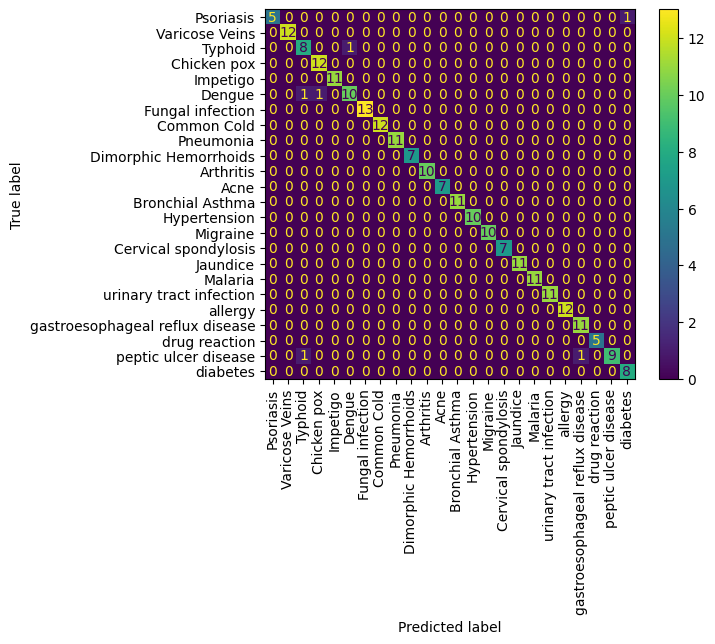

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')

In [56]:
# labels = symptom_disease_data['label'].unique()
# labels

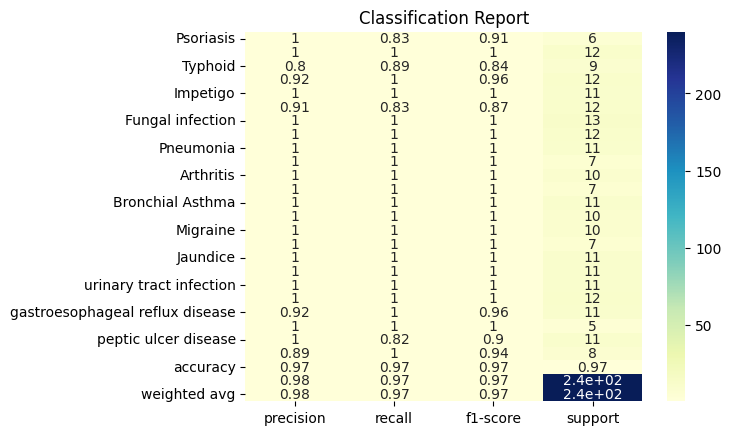

In [57]:
report = classification_report(y_test, y_pred, labels=labels, target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(report).T, annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()

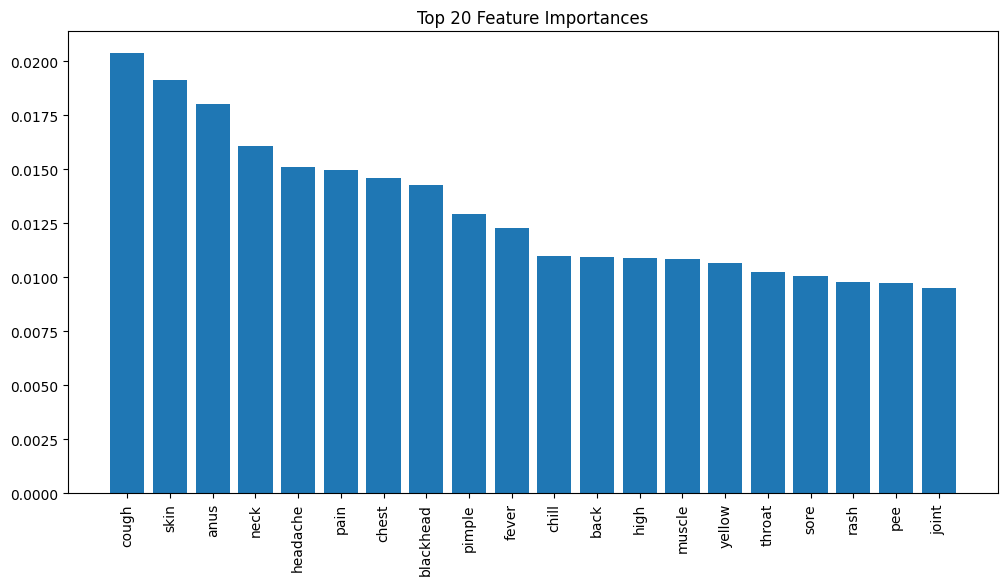

In [58]:
importances = bow_rfcl.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # Top 20 features

plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), vectorizer.get_feature_names_out()[indices], rotation=90)
plt.show()

In [59]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [60]:
symptom = "Skin rash on arms, legs, and torso. Redness in the area"
processed_symptom = preprocess_text(symptom)
symptom_bow = vectorizer.transform([processed_symptom])
predicted_disease = bow_rfcl.predict(symptom_bow)[0]
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Psoriasis


In [61]:
symptom2 = "My skin has become yellow and I am extremely itchy, I also have been experiencing a high fever"
processed_symptom2 = preprocess_text(symptom2)
symptom_bow2 = vectorizer.transform([processed_symptom2])
predicted_disease2 = bow_rfcl.predict(symptom_bow2)[0]
print(f"Predicted Disease: {predicted_disease2}")

Predicted Disease: Jaundice


In [62]:
tfidf_vector = TfidfVectorizer(
    ngram_range = (1, 2),   #keep some words like sore throat or chest pain together
    min_df = 2,    #Only include it if it appears in 2 or more cases. Excludes super rare words
    max_df = 0.9,
)
tfidf_vectorizor = tfidf_vector.fit(flattened_data)
tfidf_matrix = tfidf_vector.transform(flattened_data)

feature_names = tfidf_vector.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# tfidf_df.insert(0, "Original_Index", symptom_disease_data.index)

tools.display_dataframe_to_user(name="TF-IDF Representation", dataframe=tfidf_df)

TF-IDF Representation


In [63]:
def tfidf_vectorize_and_average(texts):
    if len(texts) == 0:
        return np.zeros(tfidf_vectorizor.transform(flattened_data[:1]).shape[1])  # Return zero vector if no text
    vectors = tfidf_vectorizor.transform(texts).toarray()
    return np.mean(vectors, axis=0)

In [64]:
symptom_disease_data['tfidf_vectors'] = symptom_disease_data['filtered_text'].apply(tfidf_vectorize_and_average)

In [65]:
symptom_disease_data['tfidf_vectors'].shape

(1200,)

In [66]:
symptom_disease_data['tfidf_vectors'][0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(3390,))

In [67]:
tfidf_X = np.vstack(symptom_disease_data['tfidf_vectors'])
tfidf_y = symptom_disease_data['label']
print(f"tfidf_X: {tfidf_X.shape}\ntfidf_y: {tfidf_y.shape}")

tfidf_X: (1200, 3390)
tfidf_y: (1200,)


In [68]:
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = \
    train_test_split(tfidf_X, tfidf_y, test_size=0.2, random_state=42)

In [69]:
model_1 = RandomForestClassifier(n_jobs=-1)
model_1.fit(X_tfidf_train, y_tfidf_train)

RandomForestClassifier(n_jobs=-1)

In [70]:
y_tfidf_pred = model_1.predict(X_tfidf_test)

In [71]:
accuracy = accuracy_score(y_tfidf_test, y_tfidf_pred)
precision = precision_score(y_tfidf_test, y_tfidf_pred, average='weighted')
recall = recall_score(y_tfidf_test, y_tfidf_pred, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.9625
Precision: 0.9645726495726495
Recall: 0.9625


In [72]:
model_2 = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42, n_jobs=-1)
model_2.fit(X_tfidf_train, y_tfidf_train)

RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [73]:
y_tfidf_pred = model_2.predict(X_tfidf_test)

In [74]:
accuracy = accuracy_score(y_tfidf_test, y_tfidf_pred)
precision = precision_score(y_tfidf_test, y_tfidf_pred, average='weighted')
recall = recall_score(y_tfidf_test, y_tfidf_pred, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.9666666666666667
Precision: 0.9697517297517297
Recall: 0.9666666666666667


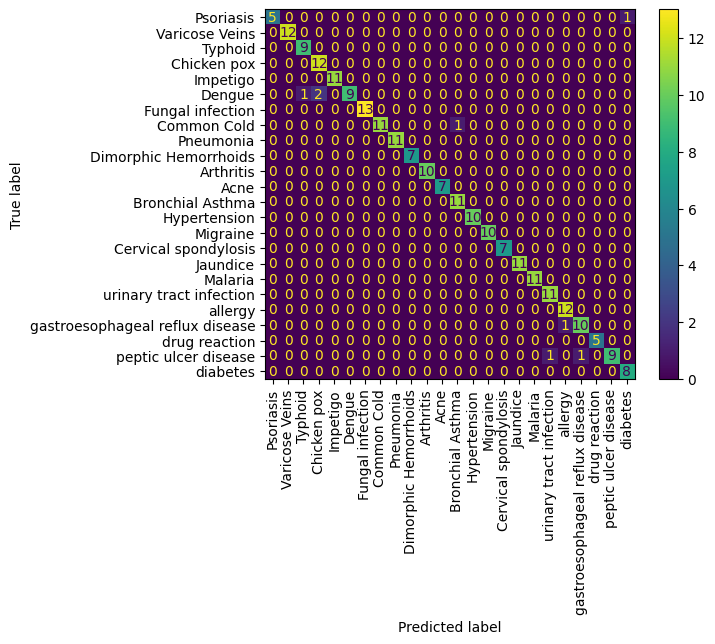

In [75]:
# cm2 = confusion_matrix(y_tfidf_test, y_tfidf_pred)

cm2 = confusion_matrix(y_tfidf_test, y_tfidf_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp.plot(xticks_rotation='vertical')

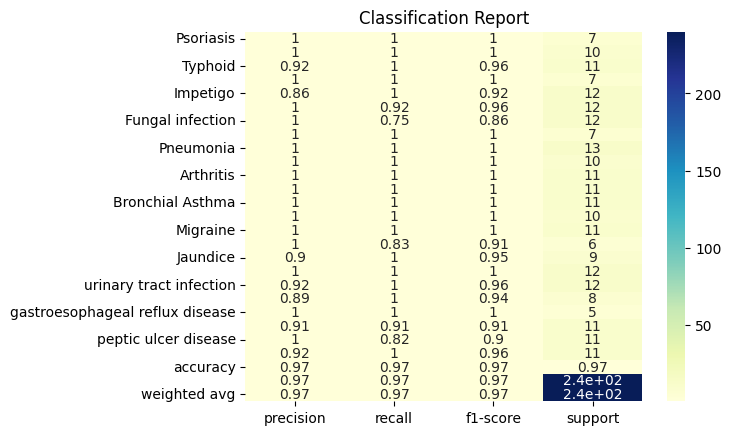

In [76]:
report1 = classification_report(y_tfidf_test, y_tfidf_pred, target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(report1).T, annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()

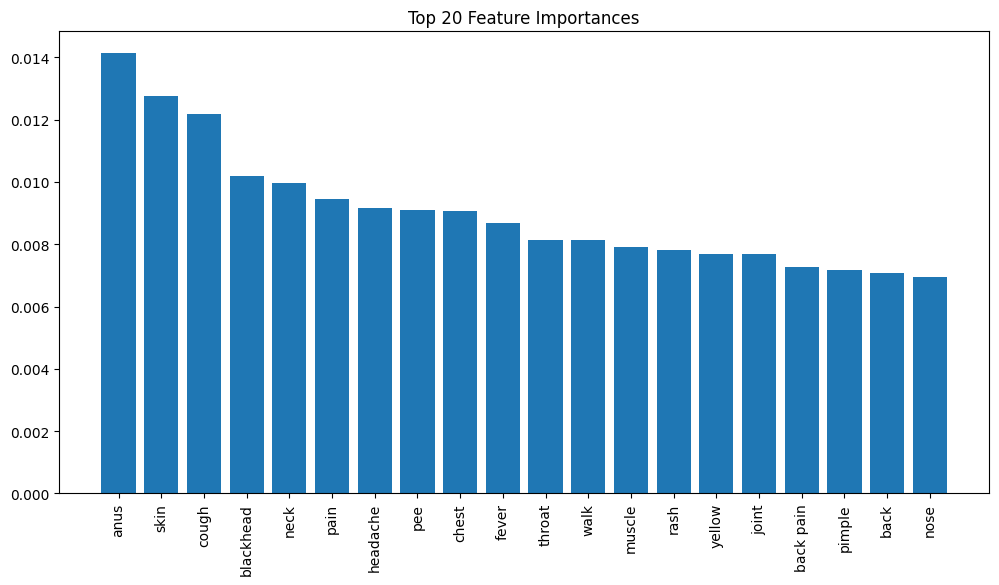

In [77]:
importances2 = model_2.feature_importances_
indices2 = np.argsort(importances2)[::-1][:20]  # Top 20 features

plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(len(indices2)), importances2[indices2], align='center')
plt.xticks(range(len(indices2)), tfidf_vectorizor.get_feature_names_out()[indices2], rotation=90)
plt.show()

In [78]:
symptom3 = "Swelling in legs, inflamed calves"
processed_symptom3 = preprocess_text(symptom3)
symptom_tfidf = tfidf_vectorizor.transform([processed_symptom3])
predicted_disease3 = model_2.predict(symptom_tfidf)[0]
print(f"Predicted Disease: {predicted_disease3}")

Predicted Disease: Varicose Veins


In [79]:
symptom4 = "Skin and eyes are yellow and I have been experiencing high fever"
processed_symptom4 = preprocess_text(symptom4)
symptom_tfidf_2 = tfidf_vectorizor.transform([processed_symptom4])
predicted_disease4 = model_2.predict(symptom_tfidf_2)[0]
print(f"Predicted Disease: {predicted_disease4}")

Predicted Disease: Jaundice


I am changing the model to KNeighbors Classifier to compare against the Random Forest Classifier

In [80]:
kn_bow = KNeighborsClassifier(n_neighbors=3, weights='distance')
# kn_bow = KNeighborsClassifier()
kn_bow.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [81]:
y_pred_kn = kn_bow.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred_kn)
precision = precision_score(y_test, y_pred_kn, average='weighted')
recall = recall_score(y_test, y_pred_kn, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.9083333333333333
Precision: 0.9228169746919747
Recall: 0.9083333333333333


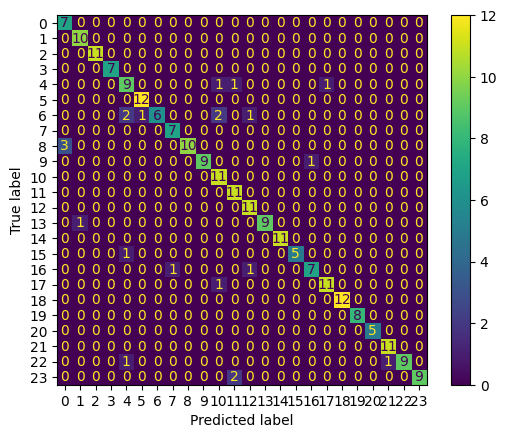

In [83]:
cm3 = confusion_matrix(y_test, y_pred_kn)

ConfusionMatrixDisplay(confusion_matrix=cm3).plot();

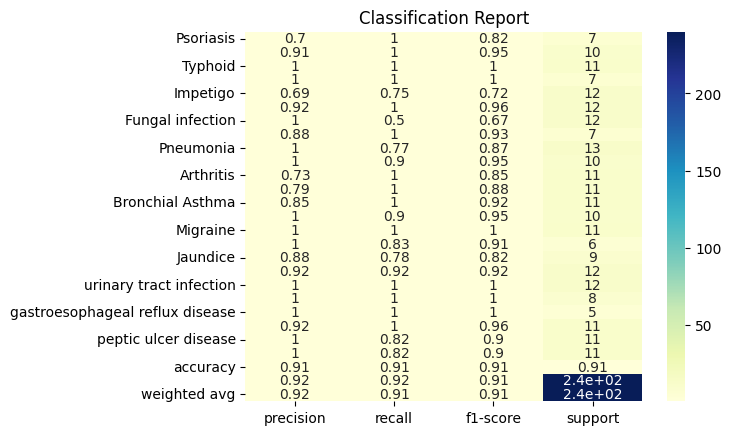

In [84]:
report2 = classification_report(y_test, y_pred_kn, target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(report2).T, annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()

In [85]:
# Without any hyper-parameterized tuining

accuracy = accuracy_score(y_test, y_pred_kn)
# precision = precision_score(y_test, y_pred_kn, average='weighted')
recall = recall_score(y_test, y_pred_kn, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.9083333333333333
Precision: 0.9228169746919747
Recall: 0.9083333333333333


In [86]:
symptom = "Swelling in legs, inflamed calves"
processed_symptom = preprocess_text(symptom)
symptom_bow = vectorizer.transform([processed_symptom])
predicted_disease = kn_bow.predict(symptom_bow)[0]
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Varicose Veins


In [87]:
symptom = "Skin and eyes are yellow and I have been experiencing high fever"
processed_symptom = preprocess_text(symptom)
symptom_bow = vectorizer.transform([processed_symptom])
predicted_disease = kn_bow.predict(symptom_bow)[0]
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Jaundice


KNeighbors Classifier using TF-IDF method

In [88]:
kn_tfidf_1 = KNeighborsClassifier(n_jobs=-1)
# kn_tfidf = KNeighborsClassifier()
kn_tfidf_1.fit(X_tfidf_train, y_tfidf_train)

KNeighborsClassifier(n_jobs=-1)

In [89]:
y_pred_tfidf = kn_tfidf_1.predict(X_tfidf_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred_tfidf)
precision = precision_score(y_test, y_pred_tfidf, average='weighted')
recall = recall_score(y_test, y_pred_tfidf, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.8791666666666667
Precision: 0.8977757427757427
Recall: 0.8791666666666667


In [91]:
kn_tfidf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
# kn_tfidf = KNeighborsClassifier()
kn_tfidf.fit(X_tfidf_train, y_tfidf_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [92]:
y_pred_tfidf = kn_tfidf.predict(X_tfidf_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred_tfidf)
precision = precision_score(y_test, y_pred_tfidf, average='weighted')
recall = recall_score(y_test, y_pred_tfidf, average='weighted')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}")

Accuracy: 0.9
Precision: 0.9145521723646723
Recall: 0.9


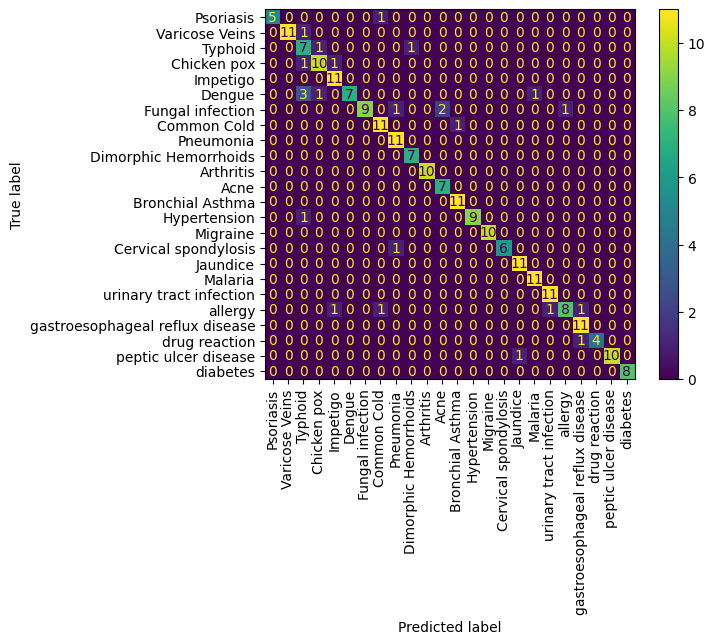

In [94]:
# cm = confusion_matrix(y_test, y_pred_tfidf)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();
cm = confusion_matrix(y_test, y_pred_tfidf, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')

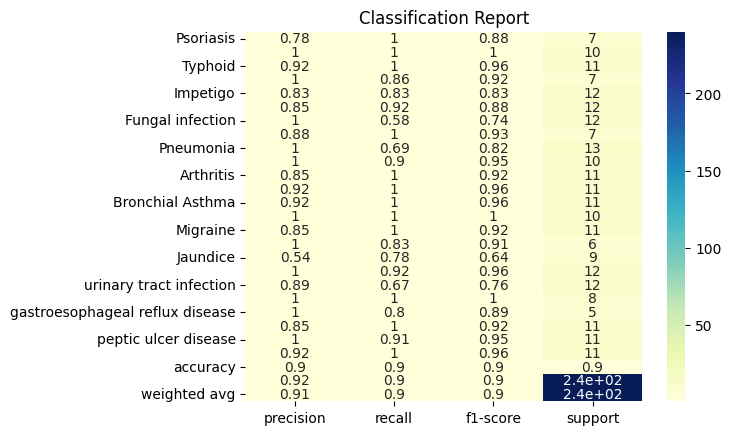

In [95]:
report2 = classification_report(y_test, y_pred_tfidf, target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(report2).T, annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()

In [96]:
symptom = "Swelling in legs, inflamed calves"
processed_symptom = preprocess_text(symptom)
symptom_bow = tfidf_vectorizor.transform([processed_symptom])
predicted_disease = kn_tfidf.predict(symptom_bow)[0]
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Chicken pox


In [97]:
symptom4 = "Skin and eyes are yellow and I have been experiencing high fever"
processed_symptom4 = preprocess_text(symptom4)
symptom_tfidf_2 = tfidf_vectorizor.transform([processed_symptom4])
predicted_disease4 = kn_tfidf.predict(symptom_tfidf_2)[0]
print(f"Predicted Disease: {predicted_disease4}")

Predicted Disease: Jaundice


In [98]:
import pickle
with open ('dans_nlp_pipeline.pkl', 'wb') as f:
    pickle.dump((tfidf_vectorizor, model_2, kn_tfidf), f)

In [99]:
import os
import pickle

current_dir = os.getcwd()

current_dir

with open("/Users/danielfishbein/Documents/python-ml-final/ml-models/naiveBays/report.pkl", 'rb') as f:
    report_nb = pickle.load(f)

f1_nb = pd.Series({label: report_nb[label]['f1-score'] * 100 for label in labels})

In [107]:
with open("/Users/danielfishbein/Documents/python-ml-final/ml-models/rnn/rnn_f1_report.pkl", "rb") as f:
    report_torch = pickle.load(f)

f1_rnn = pd.Series(report_torch["f1_scores"] * 100, index=report_torch["label_names"])

In [108]:
f1_rnn

Acne                               100.000000
Arthritis                          100.000000
Bronchial Asthma                   100.000000
Cervical spondylosis               100.000000
Chicken pox                        100.000000
Common Cold                        100.000000
Dengue                             100.000000
Dimorphic Hemorrhoids              100.000000
Fungal infection                    94.736842
Hypertension                       100.000000
Impetigo                           100.000000
Jaundice                           100.000000
Malaria                            100.000000
Migraine                            95.238095
Pneumonia                          100.000000
Psoriasis                           90.000000
Typhoid                            100.000000
Varicose Veins                     100.000000
allergy                            100.000000
diabetes                            95.238095
drug reaction                      100.000000
gastroesophageal reflux disease   

In [109]:
# report1, report2
f1_rf = pd.Series({label: report1[label]['f1-score'] * 100 for label in labels})
f1_knn = pd.Series({label: report2[label]["f1-score"] * 100 for label in labels})

f1_df = pd.DataFrame(
    {
        "Random Forest": f1_rf,
        "KNN": f1_knn,
        "Naive Bayes": f1_nb
    }
)

f1_df['RNN'] = f1_rnn

In [110]:
f1_df

,Random Forest,KNN,Naive Bayes,RNN
Psoriasis,100.000000,87.500000,100.000000,90.000000
Varicose Veins,100.000000,100.000000,100.000000,100.000000
Typhoid,95.652174,95.652174,92.857143,100.000000
Chicken pox,100.000000,92.307692,100.000000,100.000000
Impetigo,92.307692,83.333333,90.909091,100.000000
Dengue,95.652174,88.000000,82.352941,100.000000
Fungal infection,85.714286,73.684211,100.000000,94.736842
Common Cold,100.000000,93.333333,100.000000,100.000000
Pneumonia,100.000000,81.818182,100.000000,100.000000
Dimorphic Hemorrhoids,100.000000,94.736842,100.000000,100.000000


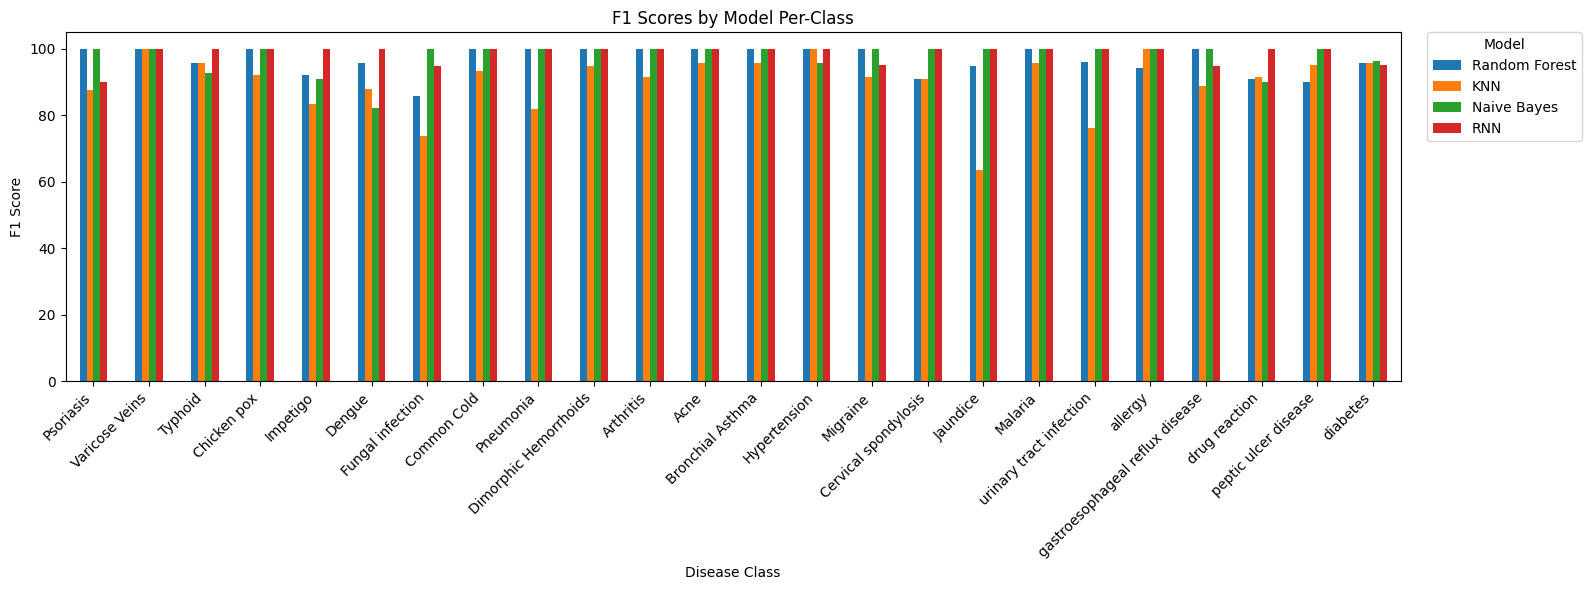

In [111]:
f1_df.plot(kind='bar', figsize=(16, 6))
plt.title("F1 Scores by Model Per-Class")
plt.ylabel("F1 Score")
plt.xlabel("Disease Class")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()